<a href="https://colab.research.google.com/github/seungbinahn/START_AI/blob/master/02_Machine_Learning%E2%80%8E/06_2_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network

다층 퍼셉트론의 한계
* 원하는 결과를 위해 매개변수를 사람이 찾아야 함
* Neural Network는 데이터를 통해 적절한 매개변수를 자동으로 학습

1. y = h(b + w1x1 + w2x2)

2. h(x) = 0(x<=0) , 1(x>0)

3. a = b + w1x1 + w2x2

4. y = h(a)


## Activation Function(활성화 함수)

* 활성화 함수 h(x) : 입력신호의 총합을 출력 신호로 변환하는 함수
* a = b + w1x1 + w2x2 : 가중치가 달린 입력 신호와 편향의 총합을 계산

* y = h(a) : 계산된 값의 결과(a)를 h()함수에 넣어 출력신호(y) 생성


1. Threshold(임계 값)을 경계로 출력 값을 변경하는 함수
2. 퍼셉트론은 활성화 함수로 Step Function 사용
3. Neural Network에는 다른 활성화 함수 사용
ex) Sigmoid, ReLu, Tanh, 등



### Step 

In [1]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  if x > 0: return 1
  else : return 0

In [2]:
# step 구현 방법 1
def step_function(x):
  y = x > 0
  return y.astype(np.int)

In [3]:
# step 구현 방법 2
def step_function(x):
  return np.array(x > 0, dtype=np.int)

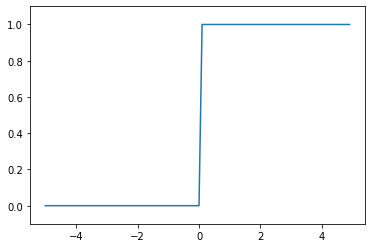

In [4]:
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)

plt.plot(X,Y)
plt.ylim(-0.1, 1.1)
plt.show()

### Sigmoid 

In [5]:
import numpy as np
import matplotlib.pylab as plt

In [6]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

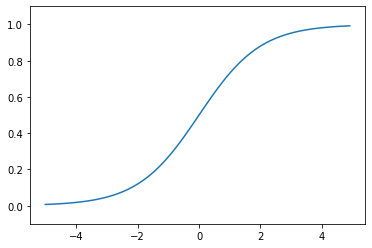

In [7]:
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)

plt.plot(X,Y)
plt.ylim(-0.1, 1.1)
plt.show()

### Step vs Sigmoid
1. 공통점
* 0 ~ 1 사이의 값을 반환
* 입력이 중요하면 큰 값, 안중요하면 작은값
* 비선형 함수     
      
2. 차이점
* 0,1만 반환 vs 연속적인 실수 값 반환
2. Sigmoid가 더 많은 정보를 유지

### ReLu
* 최근에 가장 많이 사용되는 활성화 함수 중 하나
* 입력이 0 초과이면 입력 그대로 반환, 0이하면 0 반환

h(x) = {x (x>=0), 0(x<=0)}

In [8]:
def relu(x):
  return np.maximum(0,x)

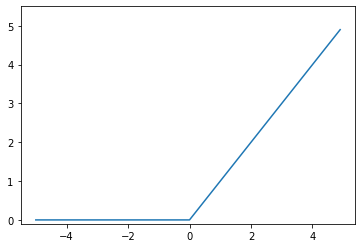

In [9]:
X = np.arange(-5.0, 5.0, 0.1)
Y = relu(X)

plt.plot(X,Y)
plt.ylim(-0.1, 5.5)
plt.show()

## Matrix Dot Product

In [10]:
A = np.array([[1,2],[3,4]])
print(A.shape)

B = np.array([[5,6],[7,8]])
print(B.shape)

np.dot(A,B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [11]:
A = np.array([[1,2,3],[4,5,6]])
print(A.shape)

B = np.arange(6)
B.shape = (3,2)
print(B.shape)

np.dot(A,B)

(2, 3)
(3, 2)


array([[16, 22],
       [34, 49]])

In [12]:
# 행렬 크기에 따른 연산 실패
A = np.array([[1,2,3],[4,5,6]])
print(A.shape)

C = np.arange(4)
C.shape = (2,2)
print(C.shape)

np.dot(A,C)

(2, 3)
(2, 2)


ValueError: ignored

## Neural Network 구현

### 1st Layer

In [13]:
import numpy as np
X = np.array([1.0,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3]) # 편향은 A가 (3,) 이므로 (3,) shape를 가진다

print(X.shape) # (2,) = (1,2)
print(W1.shape) # (2,3)
print(B1.shape) # (3,) = (1,3)
print()

A1 = np.dot(X, W1) + B1
A1

(2,)
(2, 3)
(3,)



array([0.3, 0.7, 1.1])

### 활성화 함수 적용

In [14]:
# Activation Function
Z1 = sigmoid(A1) # 시그모이드 적용
Z1

array([0.57444252, 0.66818777, 0.75026011])

### 2nd Layer

In [15]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]]) # (3,2)
B2 = np.array([0.1,0.2]) # (2,)

print(Z1.shape) # (3,) = (1,3)
print(W2.shape) # (3,2)
print(B1.shape) # (2,) = (1,2)
print()

A2 = np.dot(Z1,W2) + B2 # (1,3) dot (3,2) = (1,2)
A2

(3,)
(3, 2)
(3,)



array([0.51615984, 1.21402696])

### 활성화 함수 적용

In [16]:
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

### Output Layer

In [17]:
def identity_function(x):
  return x
# A2 = (1,2) = (2,)

W3 = np.array([[0.1,0.3],[0.2,0.4]]) # (2,2)
B3 = np.array([0.1,0.2]) # (1,2) = (2,)

A3 = np.dot(Z2, W3) + B3  # (1,2) dot (2,2) = (1,2) = (2,)
Y = identity_function(A3) # 혹은 Y = A3
Y

array([0.31682708, 0.69627909])

### 전체 한번에 구현

In [18]:
def init_network():
  """
  weight와 bias 초기화 및 저장
  return : weight and bias dictionary
  """
  network = {}
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1'] = np.array([0.1,0.2,0.3])
  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2'] = np.array([0.1,0.2])
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['b3'] = np.array([0.1,0.2])

  return network

def forward(network, x):
  """
  input 신호를 Output으로 변환하는 처리 과정
  return y
  """
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)

  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

In [19]:
network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### 출력층 설계
* Output layer의 활성화 함수는 풀고자 하는 문제에 따라 다름
* Regression : Identity Function
* Binary Classification : Sigmoid Function
* Multiple Classification : Softmax Function

## Softmax Function
* 다중 분류를 위한 출력 층 함수
* Softmax의 결과를 모두 합하면 1이 됨

Yk = exp(ak) / sum(ai)    
sum(yi) = 1

In [20]:
def softmax(a):
  """
  값 리스트를 확률 분포로 변화하는 함수

  a : 값 리스트
  """
  exp_a = np.exp(a) # 지수 함수 적용
  sum_exp_a = np.sum(exp_a) # 지수 함수의 합
  y = exp_a / sum_exp_a # 이산 확률분포로 변환
  
  return y

In [21]:
a = np.array([0.3,2.9,4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

* Softmax는 지수함수를 사용하고 지수 함수는 아주 큰 값을 반환
* 따라서 너무 큰 값이 반환되는 경우 Overflow 발생 가능

In [22]:
a = np.array([1000, 1000, 990])
np.exp(a) / np.sum(np.exp(a))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

### overflow 방지

In [23]:
c = np.max(a)
print(a-c)
print(np.exp(a-c) / np.sum(np.exp(a-c)))

[  0   0 -10]
[4.99988650e-01 4.99988650e-01 2.26994496e-05]


In [24]:
def softmax(a):
  """
  값 리스트를 확률 분포로 변화하는 함수
  최댓값을 각 원소에 빼서 overflow 방지
  a : 값 리스트
  """
  c = np.max(a)
  exp_a = np.exp(a-c) # 지수 함수 적용
  sum_exp_a = np.sum(exp_a) # 지수 함수의 합
  y = exp_a / sum_exp_a # 이산 확률분포로 변환
  
  return y

In [25]:
a = np.array([0.3,2.9,4.0])
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [26]:
a = np.array([30,290,400])
softmax(a)

array([2.04664112e-161, 1.68891188e-048, 1.00000000e+000])